In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
from arabic_reshaper import reshape

In [82]:
df = pd.read_csv('input/digikala-orders.csv')

In [83]:
df.head(5)

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0


In [84]:
df['DateTime_CartFinalize'] = pd.to_datetime(df['DateTime_CartFinalize'])
df['YearMonth'] = df['DateTime_CartFinalize'].dt.strftime('%Y-%m')

df.head(5)

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item,YearMonth
0,2714054,469662,21386,2015-10-15 08:50:56,597982.0,محمود آباد,1.0,2015-10
1,11104039,3063877,248497,2018-02-11 00:29:26,980000.0,خرمدره,1.0,2018-02
2,4228130,3184893,50144,2016-06-14 00:30:08,229358.0,قرچک,1.0,2016-06
3,22225624,6888562,70208,2018-09-03 14:37:19,16514.0,قم,1.0,2018-09
4,4068771,2533490,67627,2016-05-21 11:51:02,133028.0,تهران,1.0,2016-05


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID_Order               200000 non-null  int64         
 1   ID_Customer            200000 non-null  int64         
 2   ID_Item                200000 non-null  int64         
 3   DateTime_CartFinalize  200000 non-null  datetime64[ns]
 4   Amount_Gross_Order     200000 non-null  float64       
 5   city_name_fa           200000 non-null  object        
 6   Quantity_item          200000 non-null  float64       
 7   YearMonth              200000 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 12.2+ MB


In [86]:
order_counts = df.groupby(['YearMonth'])['ID_Order'].count().reset_index()
order_counts.columns = ['YearMonth' , 'Orders']

order_counts.head(5)

,YearMonth,Orders
0,2013-09,6
1,2013-10,73
2,2013-11,90
3,2013-12,116
4,2014-01,141


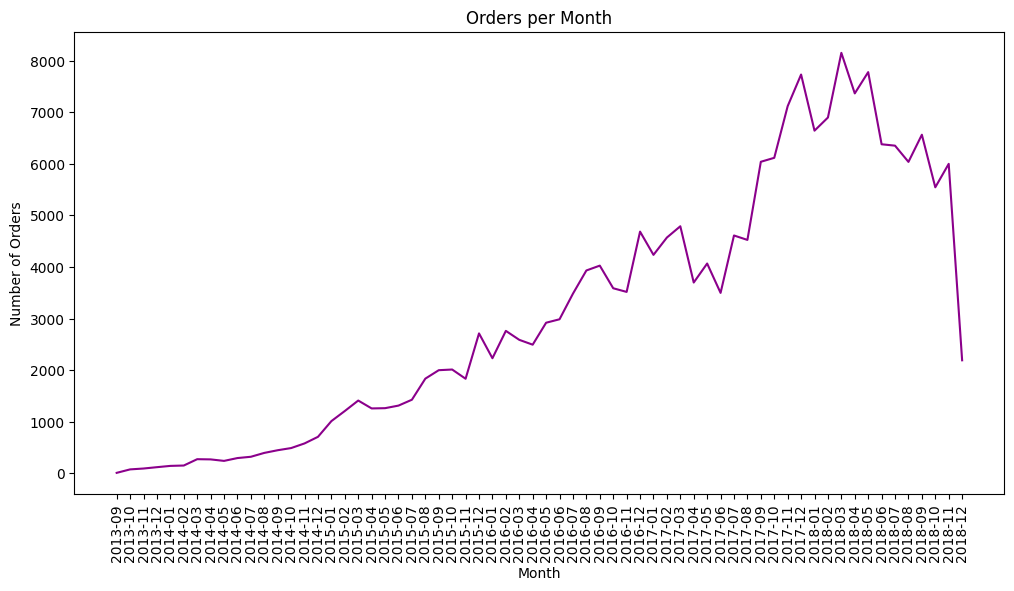

In [92]:
plt.figure(figsize=(12, 6))
plt.plot(order_counts["YearMonth"].to_numpy(dtype=str), order_counts['Orders'] , c='DarkMagenta')
plt.xticks(rotation=90)
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.title("Orders per Month")
plt.show()

In [ ]:
customer_counts = df.groupby(['city_name_fa'])['ID_Customer'].nunique().reset_index()
customer_counts.columns = ['City' , 'ID_Customers']

customer_counts.head(5)

,City,ID_Customers
0,آب بر,14
1,آبادان,320
2,آباده,48
3,آباده طشک,3
4,آبدان,2


In [ ]:
top_cities = customer_counts.sort_values('ID_Customers', ascending=False).head(7)

In [ ]:
others_cities_count = customer_counts.sort_values('ID_Customers', ascending=False)[8:]['ID_Customers'].sum()

In [ ]:
top_cities.loc[len(top_cities)] = ['سایر', others_cities_count]

In [ ]:
labels = [get_display(reshape(label)) for label in top_cities['City'].to_numpy(dtype='str')]

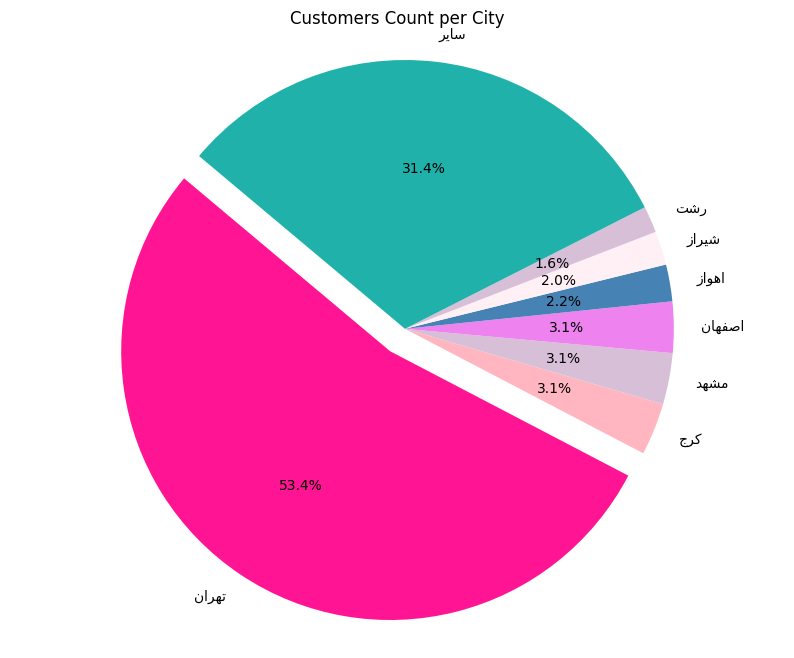

In [ ]:
sizes = [15, 30]
colors = ['#FF1493', '#FFB6C1', '#D8BFD8', '#EE82EE', '#4682B4', '#FFF0F5', '#D8BFD8', '#20B2AA']
explode = (0.1, 0, 0, 0, 0, 0, 0, 0)

plt.figure(figsize=(10, 8))
plt.pie(top_cities['ID_Customers'], explode=explode ,labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)

plt.title('Customers Count per City')
plt.axis('equal')
plt.show()